In [198]:
import numpy as np
import pandas as pd
import math as math
from scipy import constants
import matplotlib.pyplot as plt
%matplotlib inline

In [199]:
#Trajectory dictionary
trj={}
trj 

{}

Parameters of projection : initial velocity (u), angle of projection($\alpha$), g , height of projection point(h)

In [200]:
u=20 #initial velocity in m/s
alp= 45*np.pi/180 #projection angle in radian
g=constants.g #acceleration due to gravity in m/s^2
h=1.5 #height of projection point

In [201]:
alp


0.7853981633974483

$ u_x = u \cos\alpha$      ,           $ u_y = u \sin \alpha $

In [202]:
#Horizontal and vertical velocities 
ux0=u*math.cos(alp)
uy0=u*math.sin(alp)

In [203]:
ux0,uy0


(14.142135623730951, 14.142135623730951)

Time of flight for y=0 projection : 
$T_0 = \sqrt{\frac{2u_y}{g}}$ = $\sqrt{\frac{2u \sin\alpha}{g}}$

In [204]:
#time of flight for y=0 projection

T0= 2*uy0/g
T0

2.8841929963302353

Time of flight for y=h projection

$ T = T_0+ \frac{-2u_y + \sqrt{4u_y^2+8gh}}{2g}$


$T=T_0+\frac{-u_y+\sqrt{u_y^2+2gh}}{g}$

In [205]:
T=T0+(-uy0+np.sqrt(uy0**2+2*g*h))/g
T

2.9866214004938154

In [164]:
for t in np.arange(0,T,0.01):
    x=ux0*t
    y=h+uy0*t-1/2*g*t**2
    trj.update({t:[t,x,y]})
    
        
        
           

In [165]:
trj #stores trajectory history

{0.0: [0.0, 0.0, 0.001],
 0.01: [0.01, 0.1414213562373095, 0.14193135623730951],
 0.02: [0.02, 0.282842712474619, 0.281882712474619],
 0.03: [0.03, 0.4242640687119285, 0.4208540687119285],
 0.04: [0.04, 0.565685424949238, 0.5588454249492381],
 0.05: [0.05, 0.7071067811865476, 0.6958567811865476],
 0.06: [0.06, 0.848528137423857, 0.831888137423857],
 0.07: [0.07, 0.9899494936611667, 0.9669394936611667],
 0.08: [0.08, 1.131370849898476, 1.1010108498984759],
 0.09: [0.09, 1.2727922061357855, 1.2341022061357854],
 0.1: [0.1, 1.4142135623730951, 1.366213562373095],
 0.11: [0.11, 1.5556349186104046, 1.4973449186104044],
 0.12: [0.12, 1.697056274847714, 1.627496274847714],
 0.13: [0.13, 1.8384776310850237, 1.7566676310850236],
 0.14: [0.14, 1.9798989873223334, 1.8848589873223331],
 0.15: [0.15, 2.1213203435596424, 2.012070343559642],
 0.16: [0.16, 2.262741699796952, 2.1383016997969517],
 0.17: [0.17, 2.4041630560342617, 2.2635530560342616],
 0.18: [0.18, 2.545584412271571, 2.387824412271571],

In [166]:
trjy=pd.DataFrame.from_dict(trj).T #changed to dataframe and transposed


In [167]:
trjy.columns=['time','x-coord','y-coord']

In [168]:
trjy.head()

,time,x-coord,y-coord
0.00,0.00,0.000000,0.001000
0.01,0.01,0.141421,0.141931
0.02,0.02,0.282843,0.281883
0.03,0.03,0.424264,0.420854
0.04,0.04,0.565685,0.558845


In [169]:
trjy.tail()

,time,x-coord,y-coord
2.84,2.84,40.163665,0.643225
2.85,2.85,40.305087,0.505837
2.86,2.86,40.446508,0.367468
2.87,2.87,40.587929,0.228119
2.88,2.88,40.729351,0.087791


In [170]:
trjy.set_index('time') #set time as index

,x-coord,y-coord
time,,
0.00,0.000000,0.001000
0.01,0.141421,0.141931
0.02,0.282843,0.281883
0.03,0.424264,0.420854
0.04,0.565685,0.558845
...,...,...
2.84,40.163665,0.643225
2.85,40.305087,0.505837
2.86,40.446508,0.367468


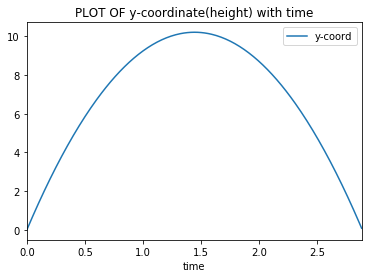

In [171]:
#PLOT OF y-coordinate(height) with time
trjy.plot(x='time',y='y-coord',title='PLOT OF y-coordinate(height) with time')

[Text(0, 0.5, 'Height in metres'), Text(0.5, 0, 'Distance in metres')]

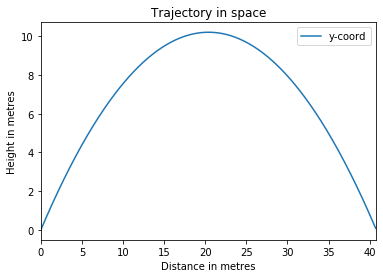

In [172]:
#Plot of trajectory in space, y-coordinate versus x-coordinate
trjy.plot(x='x-coord', y='y-coord',title='Trajectory in space').set(xlabel="Distance in metres", ylabel="Height in metres")


In [173]:
#maximum height:theoretical
Ht=uy0**2/(2*g)+h
Ht


10.205081632653062

In [174]:
H= max(trjy['y-coord']) #maximum height calculated

In [175]:
#error
(H-Ht)/Ht*100


-0.00045403341356844604

In [176]:
#finding time of landing when y-coord equals zero
trjy[trjy['y-coord']//1==0]


,time,x-coord,y-coord
0.00,0.00,0.000000,0.001000
0.01,0.01,0.141421,0.141931
0.02,0.02,0.282843,0.281883
0.03,0.03,0.424264,0.420854
0.04,0.04,0.565685,0.558845
0.05,0.05,0.707107,0.695857
0.06,0.06,0.848528,0.831888
0.07,0.07,0.989949,0.966939
2.82,2.82,39.880822,0.915062
2.83,2.83,40.022244,0.779634


Range


In [177]:
t_land=trjy[trjy['y-coord']==min(trjy['y-coord'])] #approximate time of landing
if t_land['time'].iloc[0]==0 or t_land['time'].iloc[0]<(T/2):                   #time of landing must fall at end of second half of flight
    t_land= trjy.iloc[-1,:]
t_land

time        2.880000
x-coord    40.729351
y-coord     0.087791
Name: 2.88, dtype: float64

In [178]:
type(t_land)

pandas.core.series.Series

In [179]:
t_landing= t_land['time']
t_landing

2.88

In [180]:
R=t_landing*ux0 #calculated range


In [181]:
print("The calculated range is",R)

The calculated range is 40.729350596345135


In [182]:
type(R)

numpy.float64

In [183]:
Rt=T*ux0  #theoretical range
Rt,type(Rt)

(40.817326506113446, numpy.float64)

In [184]:
print("The theoretical range is", Rt ,"metres")

The theoretical range is 40.817326506113446 metres


In [185]:
R,Rt



(40.729350596345135, 40.817326506113446)

# Summary

In [186]:
print("The theoretical time of flight was", T)
print("The calculated time of landing is", t_landing)

The theoretical time of flight was 2.8862208362378223
The calculated time of landing is 2.88


In [187]:
print("The theoretical range was", Rt)
print("The calculated range is",R)

The theoretical range was 40.817326506113446
The calculated range is 40.729350596345135


In [188]:
print("The theoretical maximum height attained in flight : ", Ht)
print("The calculated maximum height attained in flight :", H)

The theoretical maximum height attained in flight :  10.205081632653062
The calculated maximum height attained in flight : 10.205035298172568
